## 1. Trajectory Automation

All the task classes in VLABench have the function `get_expert_skill_sequence`, the function provide the execuable object-centric operation sequences in the environment. Here we load task `play_texas_holdem` as an example, see the initial image rendered in environment.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


""

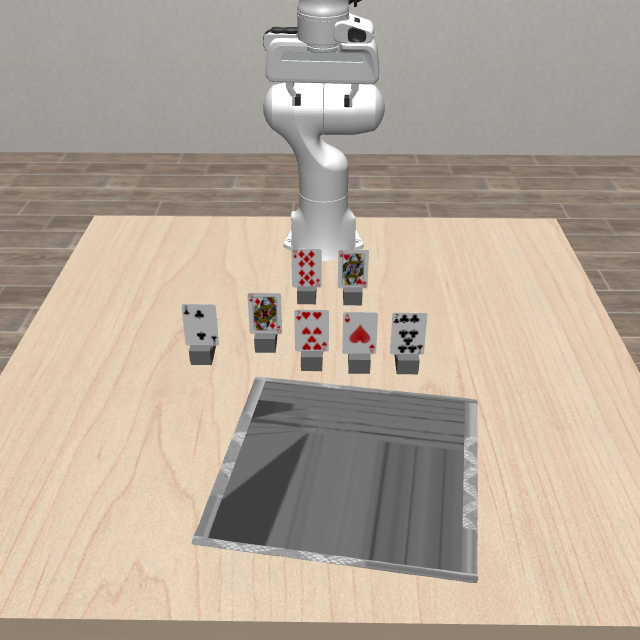

In [1]:
import numpy as np
import os
import mediapy as media
from VLABench.robots import *
from VLABench.tasks import *
from VLABench.envs import load_env

task_name = "texas_holdem"
env = load_env(task_name)
env.reset()
media.show_image(env.render(camera_id=2, height=640, width=640))

You can see the expert skill sequence that should be carried out.

In [2]:
expert_skill_sequence = env.get_expert_skill_sequence()
expert_skill_sequence

[functools.partial(<function SkillLib.pick at 0x7704302ffe20>, target_entity_name='queen_of_diamonds', prior_eulers=[[-3.141592653589793, 0, 0]]),
 functools.partial(<function SkillLib.lift at 0x77042ffd03a0>, gripper_state=array([0., 0.]), lift_height=0.1),
 functools.partial(<function SkillLib.place at 0x7704302ffeb0>, target_container_name='target_container'),
 functools.partial(<function SkillLib.pick at 0x7704302ffe20>, target_entity_name='queen_of_hearts', prior_eulers=[[-3.141592653589793, 0, 0]]),
 functools.partial(<function SkillLib.lift at 0x77042ffd03a0>, gripper_state=array([0., 0.]), lift_height=0.1),
 functools.partial(<function SkillLib.place at 0x7704302ffeb0>, target_container_name='target_container'),
 functools.partial(<function SkillLib.pick at 0x7704302ffe20>, target_entity_name='7_of_clubs', prior_eulers=[[-3.141592653589793, 0, 0]]),
 functools.partial(<function SkillLib.lift at 0x77042ffd03a0>, gripper_state=array([0., 0.]), lift_height=0.1),
 functools.partial

Carry out the skill sequence and the correspond observations and waypoints would be recorded.

In [3]:
key_frames = []
for skill in expert_skill_sequence:
    obs, waypoint, stage_success, task_success = skill(env)
    key_frames.extend([o['rgb'][2] for o in obs])
    break
media.show_video(key_frames, fps=10)

Checking if can connect to goal at 5 samples
Can connect to goal


The above describes the main logic of trajectory generation. For detailed generation scripts, please refer to the `scripts/trajectory_generation.py`.